In [1]:
import numpy as np

import omega_prime

In [2]:
r = omega_prime.Recording.from_file("example_files/pedestrian.osi", xodr_path="example_files/fabriksgatan.xodr")

In [3]:
locator = omega_prime.Locator.from_mapodr(r.map)

In [4]:
xys = np.stack([r.moving_objects[0].x, r.moving_objects[0].y]).T
xys.shape

(434, 2)

In [5]:
sts = locator.xys2sts(xys)
sts

<xarray.Dataset> Size: 10kB
Dimensions:      (time: 434)
Dimensions without coordinates: time
Data variables:
    s            (time) float64 3kB 61.61 61.28 60.95 ... 13.69 13.69 13.69
    t            (time) float64 3kB -0.001552 -0.001543 ... 0.0006975 0.0006975
    roadlane_id  (time) object 3kB (0, 0) (0, 0) (0, 0) ... (0, 0) (0, 0) (0, 0)

In [6]:
derived_xys = locator.sts2xys(sts)
derived_xys.shape

(434, 2)

In [7]:
np.max(np.linalg.norm(derived_xys - xys, axis=1))

np.float64(4.0935131040680975e-08)

(-75.0, 0.0)

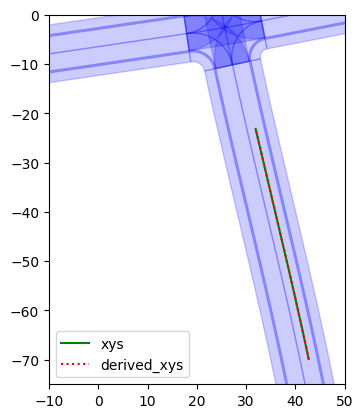

In [8]:
# %matplotlib ipympl
# pip install ipympl
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Polygon as PltPolygon

_, ax = plt.subplots(1, 1)

for lid, l in r.map.lanes.items():
    ax.add_patch(PltPolygon(l.polygon.exterior.coords, fc="blue", alpha=0.2, ec="blue"))
ax.plot(*xys.T, label="xys", c="green")
ax.plot(*derived_xys.T, label="derived_xys", c="red", linestyle="dotted")
ax.autoscale()
ax.set_aspect(1)
ax.legend()
ax.set_xlim(-10, 50)
ax.set_ylim(-75, 0)

In [9]:
sts11 = locator.xys2lane_sts(lane_id=(1, 1), xys=xys)
sts11.shape

(434, 2)